In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import keras
import sys
import h5py
import warnings
from tqdm import tqdm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
warnings.filterwarnings("ignore")
!ls

In [3]:
!git clone https://github.com/csaw-hackml/CSAW-HackML-2020.git
!ls CSAW-HackML-2020/lab3/models

Cloning into 'CSAW-HackML-2020'...
remote: Enumerating objects: 220, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 220 (delta 37), reused 17 (delta 17), pack-reused 178
Receiving objects: 100% (220/220), 83.78 MiB | 23.12 MiB/s, done.
Resolving deltas: 100% (83/83), done.
bd_net.h5  bd_weights.h5


In [4]:
!conda install -y gdown


Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.11.17 |       hbcca054_0         151 KB  conda-forge
    certifi-2023.11.17         |     pyhd8ed1ab_0         155 KB  conda-forge
    filelock-3.13.1            |     pyhd8ed1ab_0          15 KB  conda-forge
    gdown-4.7.1                |     pyhd8ed1ab_0          19 KB  conda-forge
    openssl-3.2.0              |       hd590300_1         2.7 MB  conda-forge
    ---------

In [5]:
!gdown --id 1JpoJEQV00rk5ZhOKbNpDWMVHoK43PN7s
!gdown --id 14xUWQSEpUvYWLvZWxZbM0Ud845bELwby
!gdown --id 1vr8hLQSea0fOaFGj2rOvFrggTtTali5I
!gdown --id 1LqaPMuRlK-tu2Byn778nk8eaezf_pYhw

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1JpoJEQV00rk5ZhOKbNpDWMVHoK43PN7s
From (redirected): https://drive.google.com/uc?id=1JpoJEQV00rk5ZhOKbNpDWMVHoK43PN7s&confirm=t&uuid=7459227c-400d-4e83-af3b-dce95232751d
To: /kaggle/working/bd_test.h5
100%|█████████████████████████████████████████| 398M/398M [00:02<00:00, 171MB/s]
/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=14xUWQSEpUvYWLvZWxZbM0Ud845bELwby
From (redirected): https://drive.google.com/uc?id=14xUWQSEpUvYWLvZWxZbM0Ud845bELwby&confirm=t&uuid=8da5edcc-51eb-43fe-9e27-37d

In [6]:
!ls


CSAW-HackML-2020  bd_test.h5  bd_valid.h5  test.h5  valid.h5


In [7]:
!ls CSAW-HackML-2020/lab3/models

bd_net.h5  bd_weights.h5


# BD_Net

In [8]:
import h5py
import numpy as np
import keras

# File paths
clean_dataset_path = 'valid.h5'
poisoned_dataset_path = 'bd_valid.h5'
neural_network_model_path = 'CSAW-HackML-2020/lab3/models/bd_net.h5'

def load_dataset(file_path):
    dataset = h5py.File(file_path, 'r')
    images = np.array(dataset['data']).transpose((0,2,3,1))
    labels = np.array(dataset['label'])

    return images, labels

def evaluate_model():
    # Load datasets
    clean_images, clean_labels = load_dataset(clean_dataset_path)
    poisoned_images, poisoned_labels = load_dataset(poisoned_dataset_path)

    # Load pre-trained model
    trained_model = keras.models.load_model(neural_network_model_path)

    # Evaluate clean data
    clean_predictions = np.argmax(trained_model.predict(clean_images), axis=1)
    clean_data_accuracy = np.mean(clean_predictions == clean_labels) * 100
    print('Accuracy on Clean Data:', clean_data_accuracy)

    # Evaluate poisoned data
    poisoned_predictions = np.argmax(trained_model.predict(poisoned_images), axis=1)
    attack_success_rate = np.mean(poisoned_predictions == poisoned_labels) * 100
    print('Attack Success Rate:', attack_success_rate)

if __name__ == '__main__':
    evaluate_model()


361/361 [==============================] - 7s 2ms/step
Accuracy on Clean Data: 98.64899974019225
361/361 [==============================] - 1s 2ms/step
Attack Success Rate: 100.0


In [9]:
import keras

# Load the pre-trained model
trained_neural_network = keras.models.load_model(neural_network_model_path)

# Display the summary of the model
model_details = trained_neural_network.summary()
print(model_details)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 55, 47, 3)]          0         []                            
                                                                                                  
 conv_1 (Conv2D)             (None, 52, 44, 20)           980       ['input[0][0]']               
                                                                                                  
 pool_1 (MaxPooling2D)       (None, 26, 22, 20)           0         ['conv_1[0][0]']              
                                                                                                  
 conv_2 (Conv2D)             (None, 24, 20, 40)           7240      ['pool_1[0][0]']              
                                                                                            

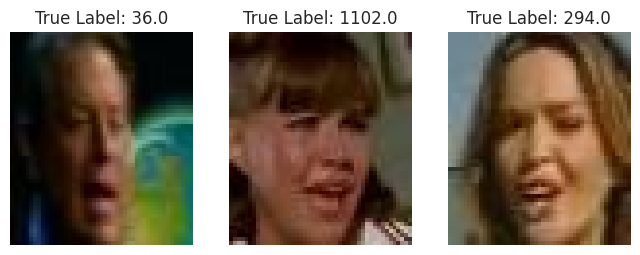

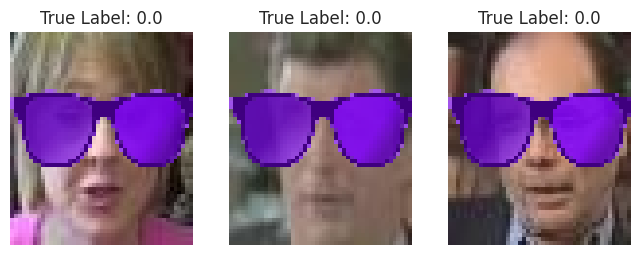

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Load clean data
x_clean, y_clean = load_dataset(clean_dataset_path)

# Display images from clean data
clean_data_fig = plt.figure(figsize=(8,8))
columns, rows = 3,1
for i in range(1, columns * rows + 1):
    random_index = np.random.randint(x_clean.shape[0], size=1)
    image, label = x_clean[random_index], y_clean[random_index]
    clean_data_fig.add_subplot(rows, columns, i)
    plt.title(f"True Label: {label[0]}")
    plt.axis("off")
    plt.imshow(image[0] / 255)
plt.show()

# Load poisoned data
x_poisoned, y_poisoned = load_dataset(poisoned_dataset_path)

# Display images from poisoned data
poisoned_data_fig = plt.figure(figsize=(8, 8))
for i in range(1, columns * rows + 1):
    random_index = np.random.randint(x_poisoned.shape[0], size=1)
    image, label = x_poisoned[random_index], y_poisoned[random_index]
    poisoned_data_fig.add_subplot(rows, columns, i)
    plt.title(f"True Label: {label[0]}")
    plt.axis("off")
    plt.imshow(image[0] / 255)
plt.show()

# Prune Defense 

In [12]:
import numpy as np
import keras
import gc
from tensorflow.keras import backend as K
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load clean and poisoned data
clean_test_data, clean_test_labels = load_dataset(clean_dataset_path)
poisoned_test_data, poisoned_test_labels = load_dataset(poisoned_dataset_path)

# Clear Keras session and collect garbage
K.clear_session()
gc.collect()

3523

In [13]:
# Original accuracy of the clean data
original_clean_accuracy = 98.423833030224

# Clone the model and set weights
model_cloned = keras.models.clone_model(trained_neural_network)
model_cloned.set_weights(trained_neural_network.get_weights())

# Initialize variables
pruning_indices = []
accuracy_clean_data = []
attack_success_rates = []
model_saved_flags = np.zeros(3, dtype=bool)

# Get activation from 'pool_3' layer
layer_activation = model_cloned.get_layer('pool_3').output
intermediate_model = keras.models.Model(inputs=model_cloned.input, outputs=layer_activation)
intermediate_output = intermediate_model.predict(clean_test_data)
average_activation = np.mean(intermediate_output, axis=(0, 1, 2))
sorted_indices = np.argsort(average_activation)

# Weights and biases from the 5th layer
layer_weights = model_cloned.layers[5].get_weights()[0]
layer_biases = model_cloned.layers[5].get_weights()[1]

# Pruning process
for channel in tqdm(sorted_indices):
    layer_weights[:, :, :, channel] = 0
    layer_biases[channel] = 0
    model_cloned.layers[5].set_weights([layer_weights, layer_biases])

    # Evaluate model on clean data
    predicted_labels_clean = np.argmax(model_cloned.predict(clean_test_data), axis=1)
    current_accuracy = np.mean(predicted_labels_clean == clean_test_labels) * 100
    accuracy_clean_data.append(current_accuracy)

    # Save model at specific accuracy drops
    for threshold, flag_index in zip([2, 4, 10], range(3)):
        if original_clean_accuracy - current_accuracy >= threshold and not model_saved_flags[flag_index]:
            model_cloned.save(f'model_X={threshold}.h5')
            model_saved_flags[flag_index] = 1

    # Evaluate model on poisoned data
    predicted_labels_poisoned = np.argmax(model_cloned.predict(poisoned_test_data), axis=1)
    attack_success_rate = np.mean(predicted_labels_poisoned == poisoned_test_labels) * 100
    attack_success_rates.append(attack_success_rate)

    # Clear session and collect garbage
    K.clear_session()
    gc.collect()


361/361 [==============================] - 1s 2ms/step


  0%|          | 0/60 [00:00<?, ?it/s]

361/361 [==============================] - 1s 2ms/step


  2%|▏         | 1/60 [00:04<04:26,  4.52s/it]

361/361 [==============================] - 1s 2ms/step


  3%|▎         | 2/60 [00:09<04:21,  4.51s/it]

361/361 [==============================] - 1s 2ms/step


  5%|▌         | 3/60 [00:13<04:17,  4.52s/it]

361/361 [==============================] - 1s 2ms/step


  7%|▋         | 4/60 [00:18<04:14,  4.55s/it]

361/361 [==============================] - 1s 2ms/step


  8%|▊         | 5/60 [00:22<04:10,  4.56s/it]

361/361 [==============================] - 1s 2ms/step


 10%|█         | 6/60 [00:27<04:05,  4.54s/it]

361/361 [==============================] - 1s 2ms/step


 12%|█▏        | 7/60 [00:31<04:00,  4.55s/it]

361/361 [==============================] - 1s 2ms/step


 13%|█▎        | 8/60 [00:36<03:56,  4.56s/it]

361/361 [==============================] - 1s 2ms/step


 15%|█▌        | 9/60 [00:40<03:51,  4.54s/it]

361/361 [==============================] - 1s 2ms/step


 17%|█▋        | 10/60 [00:45<03:46,  4.54s/it]

361/361 [==============================] - 1s 2ms/step


 18%|█▊        | 11/60 [00:49<03:43,  4.55s/it]

361/361 [==============================] - 1s 2ms/step


 20%|██        | 12/60 [00:54<03:38,  4.56s/it]

361/361 [==============================] - 1s 2ms/step


 22%|██▏       | 13/60 [00:59<03:34,  4.56s/it]

361/361 [==============================] - 1s 2ms/step


 23%|██▎       | 14/60 [01:03<03:29,  4.55s/it]

361/361 [==============================] - 1s 2ms/step


 25%|██▌       | 15/60 [01:08<03:23,  4.53s/it]

361/361 [==============================] - 1s 2ms/step


 27%|██▋       | 16/60 [01:12<03:19,  4.53s/it]

361/361 [==============================] - 1s 2ms/step


 28%|██▊       | 17/60 [01:17<03:14,  4.52s/it]

361/361 [==============================] - 1s 2ms/step


 30%|███       | 18/60 [01:21<03:12,  4.58s/it]

361/361 [==============================] - 1s 2ms/step


 32%|███▏      | 19/60 [01:26<03:07,  4.57s/it]

361/361 [==============================] - 1s 2ms/step


 33%|███▎      | 20/60 [01:30<03:02,  4.55s/it]

361/361 [==============================] - 1s 2ms/step


 35%|███▌      | 21/60 [01:35<02:57,  4.55s/it]

361/361 [==============================] - 1s 2ms/step


 37%|███▋      | 22/60 [01:40<02:53,  4.56s/it]

361/361 [==============================] - 1s 2ms/step


 38%|███▊      | 23/60 [01:44<02:48,  4.56s/it]

361/361 [==============================] - 1s 2ms/step


 40%|████      | 24/60 [01:49<02:44,  4.58s/it]

361/361 [==============================] - 1s 2ms/step


 42%|████▏     | 25/60 [01:53<02:41,  4.61s/it]

361/361 [==============================] - 1s 2ms/step


 43%|████▎     | 26/60 [01:58<02:36,  4.61s/it]

361/361 [==============================] - 1s 2ms/step


 45%|████▌     | 27/60 [02:03<02:31,  4.59s/it]

361/361 [==============================] - 1s 2ms/step


 47%|████▋     | 28/60 [02:07<02:26,  4.59s/it]

361/361 [==============================] - 1s 2ms/step


 48%|████▊     | 29/60 [02:12<02:22,  4.58s/it]

361/361 [==============================] - 1s 2ms/step


 50%|█████     | 30/60 [02:16<02:17,  4.57s/it]

361/361 [==============================] - 1s 2ms/step


 52%|█████▏    | 31/60 [02:21<02:12,  4.58s/it]

361/361 [==============================] - 1s 2ms/step


 53%|█████▎    | 32/60 [02:26<02:08,  4.60s/it]

361/361 [==============================] - 1s 2ms/step


 55%|█████▌    | 33/60 [02:30<02:04,  4.63s/it]

361/361 [==============================] - 1s 2ms/step


 57%|█████▋    | 34/60 [02:35<01:59,  4.60s/it]

361/361 [==============================] - 1s 2ms/step


 58%|█████▊    | 35/60 [02:39<01:54,  4.58s/it]

361/361 [==============================] - 1s 2ms/step


 60%|██████    | 36/60 [02:44<01:49,  4.57s/it]

361/361 [==============================] - 1s 2ms/step


 62%|██████▏   | 37/60 [02:48<01:44,  4.56s/it]

361/361 [==============================] - 1s 2ms/step


 63%|██████▎   | 38/60 [02:53<01:40,  4.57s/it]

361/361 [==============================] - 1s 2ms/step


 65%|██████▌   | 39/60 [02:58<01:36,  4.61s/it]

361/361 [==============================] - 1s 2ms/step


 67%|██████▋   | 40/60 [03:02<01:31,  4.59s/it]

361/361 [==============================] - 1s 2ms/step


 68%|██████▊   | 41/60 [03:07<01:26,  4.57s/it]

361/361 [==============================] - 1s 2ms/step


 70%|███████   | 42/60 [03:11<01:22,  4.57s/it]

361/361 [==============================] - 1s 2ms/step


 72%|███████▏  | 43/60 [03:16<01:17,  4.57s/it]

361/361 [==============================] - 1s 2ms/step


 73%|███████▎  | 44/60 [03:20<01:12,  4.56s/it]

361/361 [==============================] - 1s 2ms/step


 75%|███████▌  | 45/60 [03:25<01:08,  4.60s/it]

361/361 [==============================] - 1s 2ms/step


 77%|███████▋  | 46/60 [03:30<01:04,  4.63s/it]

361/361 [==============================] - 1s 2ms/step


 78%|███████▊  | 47/60 [03:34<01:00,  4.63s/it]

361/361 [==============================] - 1s 2ms/step


 80%|████████  | 48/60 [03:39<00:55,  4.61s/it]

361/361 [==============================] - 1s 2ms/step


 82%|████████▏ | 49/60 [03:44<00:50,  4.61s/it]

361/361 [==============================] - 1s 2ms/step


 83%|████████▎ | 50/60 [03:48<00:45,  4.58s/it]

361/361 [==============================] - 1s 2ms/step


 85%|████████▌ | 51/60 [03:53<00:41,  4.59s/it]

361/361 [==============================] - 1s 2ms/step


 87%|████████▋ | 52/60 [03:57<00:36,  4.61s/it]

361/361 [==============================] - 1s 2ms/step


 88%|████████▊ | 53/60 [04:02<00:32,  4.60s/it]

361/361 [==============================] - 1s 2ms/step


 90%|█████████ | 54/60 [04:07<00:27,  4.58s/it]

361/361 [==============================] - 1s 2ms/step


 92%|█████████▏| 55/60 [04:11<00:22,  4.59s/it]

361/361 [==============================] - 1s 2ms/step


 93%|█████████▎| 56/60 [04:16<00:18,  4.58s/it]

361/361 [==============================] - 1s 2ms/step


 95%|█████████▌| 57/60 [04:20<00:13,  4.56s/it]

361/361 [==============================] - 1s 2ms/step


 97%|█████████▋| 58/60 [04:25<00:09,  4.58s/it]

361/361 [==============================] - 1s 2ms/step


 98%|█████████▊| 59/60 [04:29<00:04,  4.58s/it]

361/361 [==============================] - 1s 2ms/step


100%|██████████| 60/60 [04:34<00:00,  4.57s/it]


In [14]:
print("clean_accuracy: ",accuracy_clean_data)
print("attack success rate: ",attack_success_rates)

clean_accuracy:  [98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64033948211657, 98.64033948211657, 98.63167922404088, 98.65765999826795, 98.64899974019225, 98.6056984498138, 98.57105741751104, 98.53641638520828, 98.19000606218066, 97.65307006148784, 97.50584567420108, 95.75647354291158, 95.20221702606739, 94.7172425738287, 92.09318437689443, 91.49562656967177, 91.01931237550879, 89.17467740538669, 84.437516237983

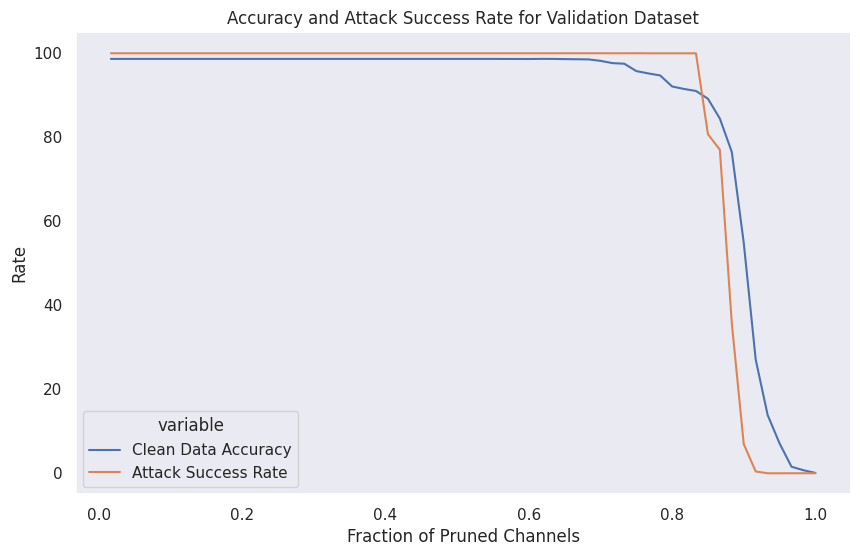

In [15]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for plotting
data = {
    'Fraction of Pruned Channels': np.arange(1, 61) / 60,
    'Clean Data Accuracy': accuracy_clean_data,
    'Attack Success Rate': attack_success_rates
}
df = pd.DataFrame(data)

# Plotting using Seaborn
# sns.set_palette("bright")
sns.set_theme(style="dark")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Fraction of Pruned Channels', y='value', hue='variable', 
             data=pd.melt(df, ['Fraction of Pruned Channels']))

plt.title("Accuracy and Attack Success Rate for Validation Dataset")
plt.ylabel("Rate")
plt.show()


# combined model

In [34]:
import numpy as np
import keras
import gc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combined model class
class CombinedModel(keras.Model):
    def __init__(self, base_model, alternate_model):
        super(CombinedModel, self).__init__()
        self.base_model = base_model
        self.alternate_model = alternate_model

    def predict(self, input_data):
        base_predictions = np.argmax(self.base_model(input_data), axis=1)
        alternate_predictions = np.argmax(self.alternate_model(input_data), axis=1)
        combined_predictions = np.zeros(input_data.shape[0])
        for i in range(input_data.shape[0]):
            combined_predictions[i] = base_predictions[i] if base_predictions[i] == alternate_predictions[i] else 1283
        return combined_predictions

In [35]:
test_data_filename = 'test.h5'
poisoned_test_data_filename = 'bd_test.h5'
test_model_X_2_filename = 'model_X=2.h5'
test_model_X_4_filename = 'model_X=4.h5'
test_model_X_10_filename = 'model_X=10.h5'
# Load test data
test_data, test_labels = load_dataset(test_data_filename)
poisoned_test_data, poisoned_test_labels = load_dataset(poisoned_test_data_filename)

# Load models
model_2_percent = keras.models.load_model(test_model_X_2_filename)
model_4_percent = keras.models.load_model(test_model_X_4_filename)
model_10_percent = keras.models.load_model(test_model_X_10_filename)



In [36]:
# Create combined models
combined_model_2 = CombinedModel(trained_neural_network, model_2_percent)
combined_model_4 = CombinedModel(trained_neural_network, model_4_percent)
combined_model_10 = CombinedModel(trained_neural_network, model_10_percent)

In [37]:
# Clear session and collect garbage
K.clear_session()
gc.collect()

4329

401/401 [==============================] - 1s 2ms/step
2%% drops model, Classification Accuracy of clean test data: 95.90023382696803
401/401 [==============================] - 1s 2ms/step
2%% drops model, Success Rate of attcaks: 100.0
/n/n
401/401 [==============================] - 1s 2ms/step
4%% drops model, Classification Accuracy of clean test data: 92.29150428682775
401/401 [==============================] - 1s 2ms/step
4%% drops model, Success Rate of attcaks: 99.98441153546376
/n/n
401/401 [==============================] - 1s 2ms/step
10%% drops model, Classification Accuracy of clean test data: 84.54403741231489
401/401 [==============================] - 1s 2ms/step
10%% drops model, Success Rate of attcaks: 77.20966484801247
/n/n


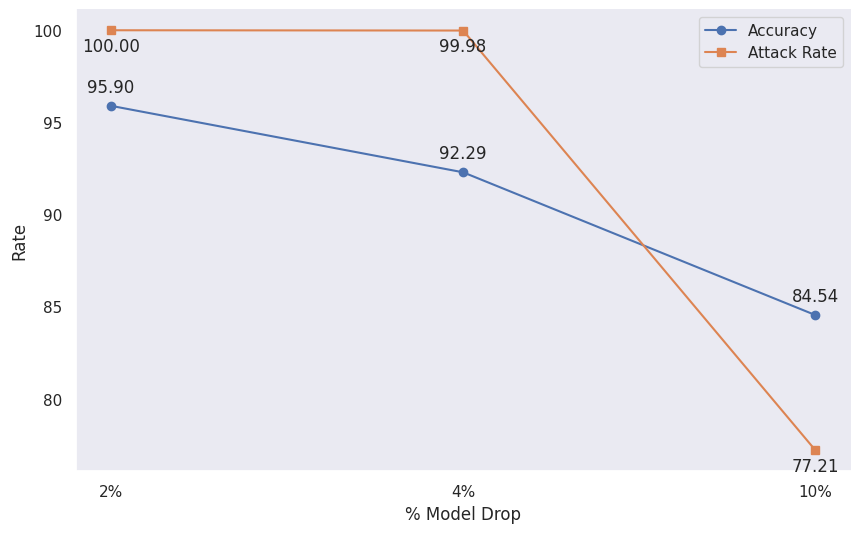

In [38]:
# Evaluate repaired models
def evaluate_model(repaired_model, test_data, test_labels, poisoned_data, poisoned_labels, drop_percentage):
    clean_label_predictions = np.argmax(repaired_model.predict(test_data), axis=1)
    clean_accuracy = np.mean(clean_label_predictions == test_labels) * 100
    print(f'{drop_percentage}% drops model, Classification Accuracy of clean test data:', clean_accuracy)

    poisoned_label_predictions = np.argmax(repaired_model.predict(poisoned_data), axis=1)
    attack_success_rate = np.mean(poisoned_label_predictions == poisoned_labels) * 100
    print(f'{drop_percentage}% drops model, Success Rate of attcaks:', attack_success_rate)
    print(f'/n/n')
    return clean_accuracy, attack_success_rate

# Evaluate each model
accuracy_2, asr_2 = evaluate_model(model_2_percent, test_data, test_labels, poisoned_test_data, poisoned_test_labels, "2%")
accuracy_4, asr_4 = evaluate_model(model_4_percent, test_data, test_labels, poisoned_test_data, poisoned_test_labels, "4%")
accuracy_10, asr_10 = evaluate_model(model_10_percent, test_data, test_labels, poisoned_test_data, poisoned_test_labels, "10%")

# Prepare data for plotting
test_accuracies = [accuracy_2, accuracy_4, accuracy_10]
attack_rates = [asr_2, asr_4, asr_10]

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.xlabel('% Model Drop')
plt.ylabel('Rate')
plt.xticks(range(len(test_accuracies)), ['2%', '4%', '10%'])

# Plotting lines
plt.plot(test_accuracies, marker='o', label='Accuracy')
plt.plot(attack_rates, marker='s', label='Attack Rate')

# Adding text labels at each data point
for i, txt in enumerate(test_accuracies):
    plt.annotate(f'{txt:.02f}', (i, test_accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(attack_rates):
    plt.annotate(f'{txt:.02f}', (i, attack_rates[i]), textcoords="offset points", xytext=(0,-15), ha='center')

plt.legend()
sns.despine()
plt.show()

Combined 2% drops model, Classification Accuracy of clean test data: 95.74434918160561
Combined 2% drops model,  Success Rate of attacks: 100.0
/n/n
Combined 4% drops model, Classification Accuracy of clean test data: 92.1278254091972
Combined 4% drops model,  Success Rate of attacks: 99.98441153546376
/n/n
Combined 10% drops model, Classification Accuracy of clean test data: 84.3335931410756
Combined 10% drops model,  Success Rate of attacks: 77.20966484801247
/n/n


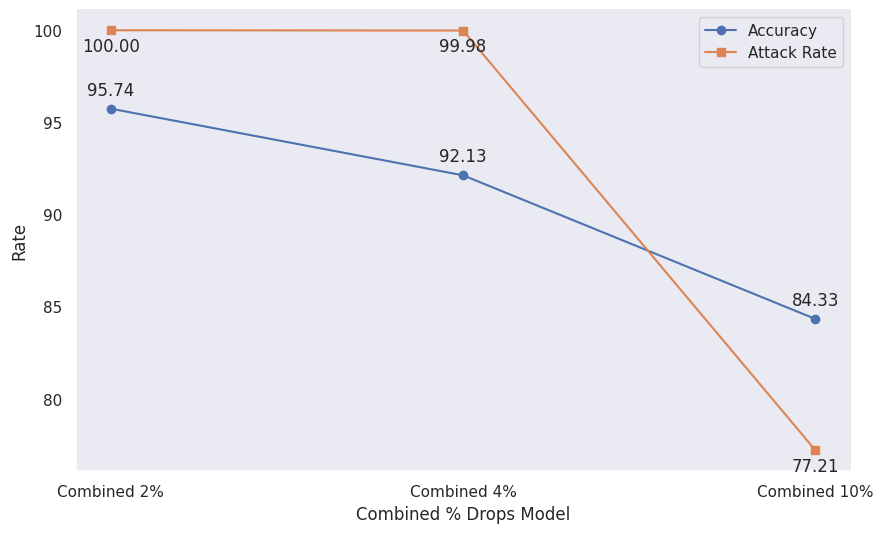

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate the combined model
def evaluate_combined_model(combined_model, test_data, test_labels, poisoned_data, poisoned_labels, drop_percentage):
    # Predictions on clean and poisoned data
    clean_predictions = combined_model.predict(test_data)
    poisoned_predictions = combined_model.predict(poisoned_data)

    # Calculate accuracy and attack success rate
    accuracy = np.mean(clean_predictions == test_labels) * 100
    attack_success_rate = np.mean(poisoned_predictions == poisoned_labels) * 100

    print(f'Combined {drop_percentage} drops model, Classification Accuracy of clean test data: {accuracy}')
    print(f'Combined {drop_percentage} drops model,  Success Rate of attacks: {attack_success_rate}')
    print(f'/n/n')

    return accuracy, attack_success_rate

# Evaluate combined models
accuracy_2, asr_2 = evaluate_combined_model(combined_model_2, test_data, test_labels, poisoned_test_data, poisoned_test_labels, "2%")
accuracy_4, asr_4 = evaluate_combined_model(combined_model_4, test_data, test_labels, poisoned_test_data, poisoned_test_labels, "4%")
accuracy_10, asr_10 = evaluate_combined_model(combined_model_10,test_data, test_labels, poisoned_test_data, poisoned_test_labels, "10%")

combined_model_data = {
    "Accuracy": [accuracy_2, accuracy_4, accuracy_10],
    "Attack Rate": [asr_2, asr_4, asr_10],
    "Model": ["Combined 2%", "Combined 4%", "Combined 10%"]
}
combined_df = pd.DataFrame(combined_model_data)
combined_df.set_index('Model', inplace=True)

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.xlabel('Combined % Drops Model')
plt.ylabel('Rate')
plt.xticks(range(len(combined_df)), combined_df.index)

# Plotting lines with markers
plt.plot(combined_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(combined_df['Attack Rate'], marker='s', label='Attack Rate')

# Adding text labels at each data point
for i, txt in enumerate(combined_df['Accuracy']):
    plt.annotate(f'{txt:.02f}', (i, combined_df['Accuracy'][i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(combined_df['Attack Rate']):
    plt.annotate(f'{txt:.02f}', (i, combined_df['Attack Rate'][i]), textcoords="offset points", xytext=(0,-15), ha='center')

plt.legend()
sns.despine()
plt.show()